In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings as wg

from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler

wg.filterwarnings('ignore')

In [2]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

In [7]:
population_df_clean_after_1996 = pd.read_csv('population_df_clean_after_1996.csv')
migration_df_clean_after_1996 = pd.read_csv('migration_df_clean_after_1996.csv')

In [8]:
population_df_clean_after_1996

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,1996,200,Under 1 year,1,Male,Number,25231
1,1996,200,Under 1 year,2,Female,Number,23623
2,1996,1,1 year,1,Male,Number,24963
3,1996,1,1 year,2,Female,Number,23611
4,1996,2,2 years,1,Male,Number,25245
...,...,...,...,...,...,...,...
5595,2023,97,97 years,2,Female,Number,821
5596,2023,98,98 years,1,Male,Number,197
5597,2023,98,98 years,2,Female,Number,632
5598,2023,646,99 years and over,1,Male,Number,352


In [9]:
migration_df_clean_after_1996

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
0,1996,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,1.7
1,1996,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,6.7
2,1996,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,8.4
3,1996,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,1.8
4,1996,GB1,United Kingdom (1),2,Female,4,Emigrants: All destinations,Thousand,7.4
...,...,...,...,...,...,...,...,...,...
1141,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,4,Emigrants: All destinations,Thousand,3.6
1142,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,5,Immigrants: All origins,Thousand,3.9
1143,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,1,Net migration,Thousand,-0.2
1144,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,4,Emigrants: All destinations,Thousand,5.2


**Sorting the datasets**

In [10]:
sorted_population_df = population_df_clean_after_1996.sort_values(by=["Single Year of Age", "Sex", "Year"])
sorted_migration_df = migration_df_clean_after_1996.sort_values(by=["Origin or Destination", "Sex", "Year"])

In [11]:
sorted_population_df

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
3,1996,1,1 year,2,Female,Number,23611
203,1997,1,1 year,2,Female,Number,23986
403,1998,1,1 year,2,Female,Number,24753
603,1999,1,1 year,2,Female,Number,25850
803,2000,1,1 year,2,Female,Number,26191
...,...,...,...,...,...,...,...
4600,2019,200,Under 1 year,1,Male,Number,30809
4800,2020,200,Under 1 year,1,Male,Number,29845
5000,2021,200,Under 1 year,1,Male,Number,28421
5200,2022,200,Under 1 year,1,Male,Number,29546


In [12]:
sorted_migration_df

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
4,1996,GB1,United Kingdom (1),2,Female,4,Emigrants: All destinations,Thousand,7.4
10,1996,US,United States,2,Female,4,Emigrants: All destinations,Thousand,2.5
16,1996,ZZWORX23,Other countries (23),2,Female,4,Emigrants: All destinations,Thousand,3.2
22,1996,-,All countries,2,Female,4,Emigrants: All destinations,Thousand,15.9
28,1996,E1420XIE,EU14 excl Irl (UK & Ireland),2,Female,4,Emigrants: All destinations,Thousand,2.8
...,...,...,...,...,...,...,...,...,...
1116,2023,AU,Australia,1,Male,1,Net migration,Thousand,1.7
1122,2023,ZZWORX23,Other countries (23),1,Male,1,Net migration,Thousand,29.5
1128,2023,-,All countries,1,Male,1,Net migration,Thousand,35.1
1134,2023,E1420XIE,EU14 excl Irl (UK & Ireland),1,Male,1,Net migration,Thousand,4.1


#### **Data Preparation for Clustering**

**Reshaping the data so that each year is a data point, and each age group's population is a feature.**

In [15]:
# Combine the 'Sex' and 'Single Year of Age' columns to create a unique feature name for each age and sex combination
sorted_population_df['Feature'] = sorted_population_df['Sex'] + "_" + sorted_population_df['Single Year of Age']

reshaped_population_df = sorted_population_df.pivot_table(index='Year', columns='Feature', values='VALUE', aggfunc='sum')
reshaped_population_df.reset_index(inplace=True)

reshaped_population_df

Feature,Year,Female_1 year,Female_10 years,Female_11 years,Female_12 years,Female_13 years,Female_14 years,Female_15 years,Female_16 years,Female_17 years,...,Male_91 years,Male_92 years,Male_93 years,Male_94 years,Male_95 years,Male_96 years,Male_97 years,Male_98 years,Male_99 years and over,Male_Under 1 year
0,1996,23611,29942,30186,31501,33098,33983,34848,34816,33947,...,562,348,270,208,132,94,57,25,116,25231
1,1997,23986,29322,29989,30335,31584,33248,34040,34827,34915,...,521,386,223,190,136,62,33,41,72,26077
2,1998,24753,28342,29494,30080,30296,31843,33144,33983,34724,...,481,327,309,139,129,69,6,39,55,27036
3,1999,25850,27457,28492,29491,30189,30543,31649,33072,33961,...,525,263,275,237,94,52,18,27,45,27437
4,2000,26191,27574,27581,28496,29607,30574,30298,31669,33193,...,558,327,233,200,200,17,69,54,37,27633
5,2001,26444,27645,27763,27551,28652,29961,30246,30198,31640,...,724,327,321,167,163,115,69,56,61,28427
6,2002,27051,27330,27735,27716,27664,29149,29513,30187,30464,...,667,451,319,247,141,80,69,41,94,27805
7,2003,26739,26165,27555,27936,27810,27852,29117,29491,30104,...,731,487,276,215,198,96,43,43,82,31047
8,2004,29534,25472,26270,27622,28042,27956,27625,29217,29527,...,889,598,350,226,174,137,69,58,77,31452
9,2005,29856,25792,25765,26550,27649,28615,27661,27660,29213,...,832,592,369,245,212,135,80,68,76,31490


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reshaped_population_df)

**Determine the Number of Clusters**

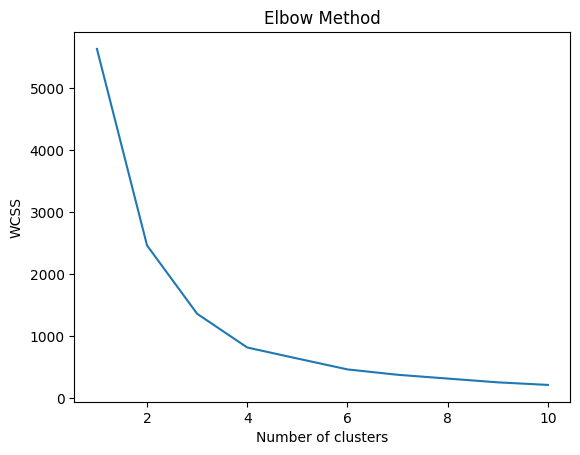

In [21]:
# Determine the optimal number of clusters
wcss = []  # within-cluster sums of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The **WCSS** is a measure of the variance of observations within each cluster. Generally, as the number of clusters increases, the WCSS value will start to decrease. On the plot, the point where the decrease in WCSS begins to level off (i.e., where the rate of decrease sharply changes) is often considered a good estimate for the true number of clusters. This point is called the "elbow". There's no mathematical formula to find the exact "elbow" in the curve—it's more of a visual inspection method. We're looking for the point at which adding another cluster doesn't provide much better fit to the data.

**Apply K-Means Clustering**

In [22]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

**Visualize the Clusters**

In [23]:
reshaped_population_df['Cluster'] = clusters
print(reshaped_population_df.groupby('Cluster')['Year'].unique())

Cluster
0    [2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...
1    [1996, 1997, 1998, 1999, 2000, 2001, 2002, 200...
2    [2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...
Name: Year, dtype: object


**Analyze Cluster Centers**

In [24]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

**Profile Each Cluster**

In [25]:
cluster_profiles = reshaped_population_df.groupby('Cluster').mean()
print(cluster_profiles)

Feature    Year  Female_1 year  Female_10 years  Female_11 years  \
Cluster                                                            
0        2009.5   32984.900000     29083.200000     28628.100000   
1        2000.0   26017.666667     27694.333333     28340.555556   
2        2019.0   29933.888889     34594.666667     34249.333333   

Feature  Female_12 years  Female_13 years  Female_14 years  Female_15 years  \
Cluster                                                                       
0           28305.200000     28136.400000     28127.500000     28065.600000   
1           28969.777778     29660.222222     30567.666667     31164.444444   
2           33890.555556     33354.000000     32683.888889     32231.222222   

Feature  Female_16 years  Female_17 years  ...  Male_91 years  Male_92 years  \
Cluster                                    ...                                 
0                27971.1     28081.800000  ...     917.300000     673.600000   
1                31940.

In [31]:
reshaped_population_df

Feature,Year,Female_1 year,Female_10 years,Female_11 years,Female_12 years,Female_13 years,Female_14 years,Female_15 years,Female_16 years,Female_17 years,...,Male_92 years,Male_93 years,Male_94 years,Male_95 years,Male_96 years,Male_97 years,Male_98 years,Male_99 years and over,Male_Under 1 year,Cluster
0,1996,23611,29942,30186,31501,33098,33983,34848,34816,33947,...,348,270,208,132,94,57,25,116,25231,1
1,1997,23986,29322,29989,30335,31584,33248,34040,34827,34915,...,386,223,190,136,62,33,41,72,26077,1
2,1998,24753,28342,29494,30080,30296,31843,33144,33983,34724,...,327,309,139,129,69,6,39,55,27036,1
3,1999,25850,27457,28492,29491,30189,30543,31649,33072,33961,...,263,275,237,94,52,18,27,45,27437,1
4,2000,26191,27574,27581,28496,29607,30574,30298,31669,33193,...,327,233,200,200,17,69,54,37,27633,1
5,2001,26444,27645,27763,27551,28652,29961,30246,30198,31640,...,327,321,167,163,115,69,56,61,28427,1
6,2002,27051,27330,27735,27716,27664,29149,29513,30187,30464,...,451,319,247,141,80,69,41,94,27805,1
7,2003,26739,26165,27555,27936,27810,27852,29117,29491,30104,...,487,276,215,198,96,43,43,82,31047,1
8,2004,29534,25472,26270,27622,28042,27956,27625,29217,29527,...,598,350,226,174,137,69,58,77,31452,1
9,2005,29856,25792,25765,26550,27649,28615,27661,27660,29213,...,592,369,245,212,135,80,68,76,31490,0


**Visualize the Clusters by Average Trend Over Time using Heatmap**

In [34]:
population_female_columns = [col for col in reshaped_population_df.columns if 'Female' in col]
population_male_columns = [col for col in reshaped_population_df.columns if 'Male' in col]

# Sum across all age groups for each gender
reshaped_population_df['Total_Female'] = reshaped_population_df[population_female_columns].sum(axis=1)
reshaped_population_df['Total_Male'] = reshaped_population_df[population_male_columns].sum(axis=1)

# Extract relevant columns for visualization
aggregated_population_df = reshaped_population_df[['Year', 'Total_Female', 'Total_Male', 'Cluster']]

aggregated_population_df

Feature,Year,Total_Female,Total_Male,Cluster
0,1996,3651710,3600464,1
1,1997,3689838,3638788,1
2,1998,3728446,3677718,1
3,1999,3766068,3717226,1
4,2000,3813180,3765892,1
5,2001,3868140,3826256,1
6,2002,3942078,3892328,1
7,2003,4005878,3953828,1
8,2004,4066548,4023828,1
9,2005,4144016,4123662,0


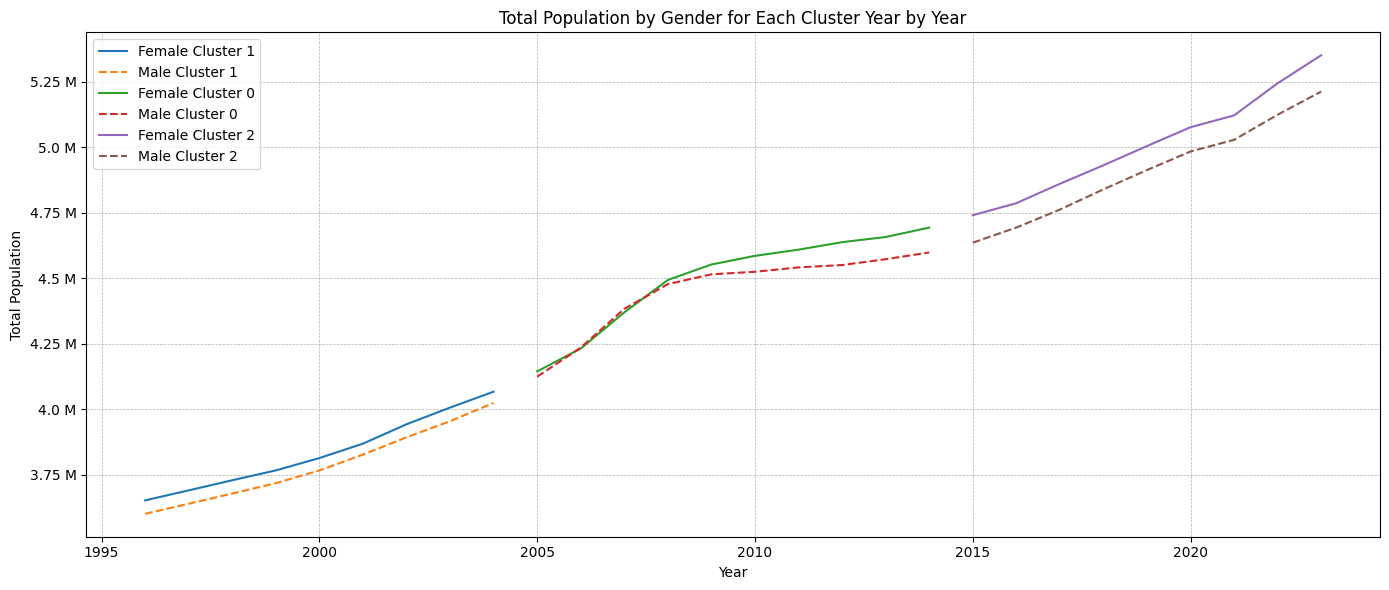

In [38]:
plt.figure(figsize=(14, 6))

plt.gca().yaxis.set_major_formatter(formatter)

clusters = aggregated_population_df['Cluster'].unique()
for cluster in clusters:
    subset = aggregated_population_df[aggregated_population_df['Cluster'] == cluster]
    plt.plot(subset['Year'], subset['Total_Female'], label=f'Female Cluster {cluster}')
    plt.plot(subset['Year'], subset['Total_Male'], label=f'Male Cluster {cluster}', linestyle='--')

plt.title('Total Population by Gender for Each Cluster Year by Year')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

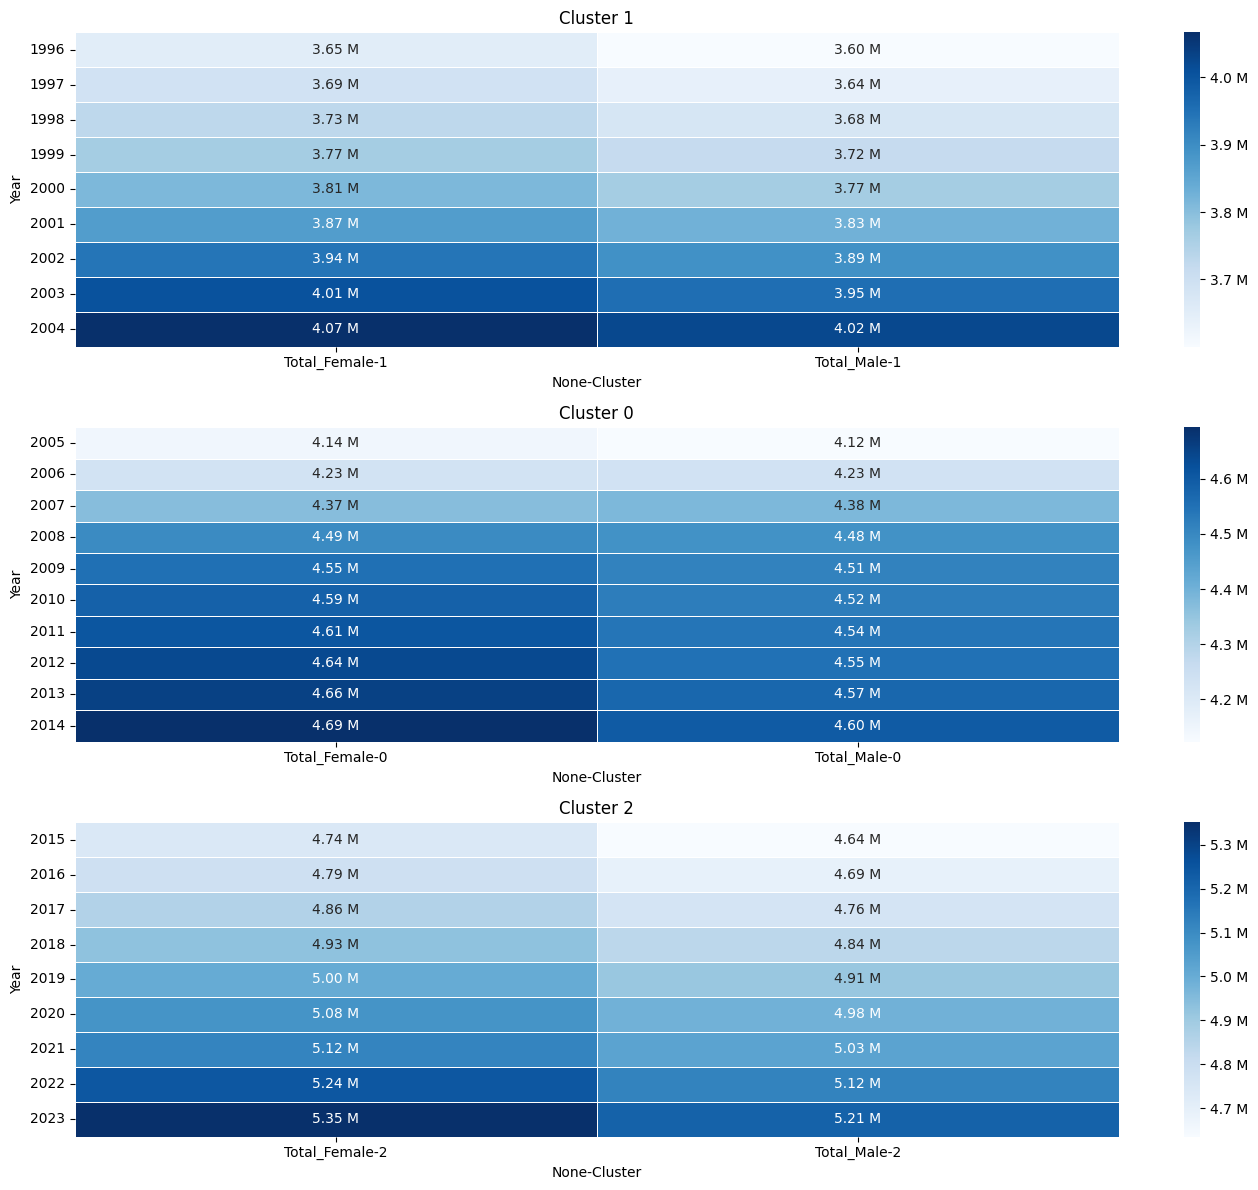

In [50]:
def format_heatmap_annotation(x):
    return f"{x / 1e6:.2f} M"

plt.figure(figsize=(14, len(clusters) * 4))

for i, cluster in enumerate(clusters, 1):
    plt.subplot(len(clusters), 1, i)
    subset = aggregated_population_df[aggregated_population_df['Cluster'] == cluster]
    heatmap_data = subset.pivot(index='Year', columns='Cluster', values=['Total_Female', 'Total_Male'])
    
    annot_data = heatmap_data.applymap(format_heatmap_annotation)
    
    sns.heatmap(heatmap_data, cmap='Blues', annot=annot_data, fmt='', linewidths=0.5, cbar_kws={'format': formatter})
    plt.title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()